# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
2. Zdefiniuj rozmiar okna.
3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
    - Obliczanie różnicy: `window - window[rowWin, colWin]`.
    - Obliczanie kwadratów: `np.square`.
    - Obliczanie pierwiastka: `np.sqrt`.
    - Obliczanie sumy metodą `.sum`.
6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
Wykorzystaj funkcję `np.argmin`.
Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
8. Wyświetl obraz oryginalny i przefiltrowany.
9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

In [2]:
def plot_two(I1, I2, t1="Orginal", t2=""):
    fig, axs = plt.subplots(1, 2)
    n = 4
    fig.set_size_inches(2 * n, n)

    axs[0].imshow(I1, vmin=0, vmax=256)
    axs[0].axis('off')
    axs[0].title.set_text(t1)

    axs[1].imshow(I2, vmin=0, vmax=256)
    axs[1].axis('off')
    axs[1].title.set_text(t2)

In [3]:
lena = cv2.imread('lenaRGB.png')
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

lena2 = cv2.imread('lenaRGBSzum.png')
lena2 = cv2.cvtColor(lena2, cv2.COLOR_BGR2RGB)

In [4]:
from copy import deepcopy


def color_filter_med(I, size):
    I = I.astype(np.float64)
    new_I = deepcopy(I)
    x_size, y_size, _ = I.shape
    for x in range(size // 2, x_size - size // 2):
        for y in range(size // 2, y_size - size // 2):
            window = I[x - size // 2: x + size // 2 + 1, y - size // 2: y + size // 2 + 1, :]
            dists = np.zeros(shape=(size, size))
            for rowWin in range(size):
                for colWin in range(size):
                    W = window - window[rowWin, colWin]
                    W = np.power(W, 2)
                    W = np.sum(W, axis=2)
                    W = np.sqrt(W)
                    dists += W
            min_idx = np.argmin(dists)
            idx = np.unravel_index(min_idx, (size, size))
            new_I[x, y] = window[idx[0], idx[1]]

    return new_I.astype(np.int32)


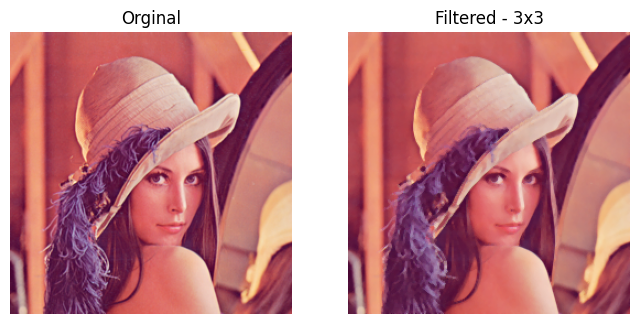

In [5]:
filtered = color_filter_med(lena, 3)
plot_two(lena, filtered, t2="Filtered - 3x3")

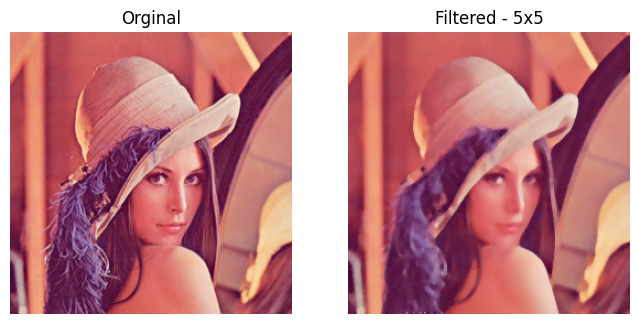

In [6]:
filtered = color_filter_med(lena, 5)
plot_two(lena, filtered, t2="Filtered - 5x5")

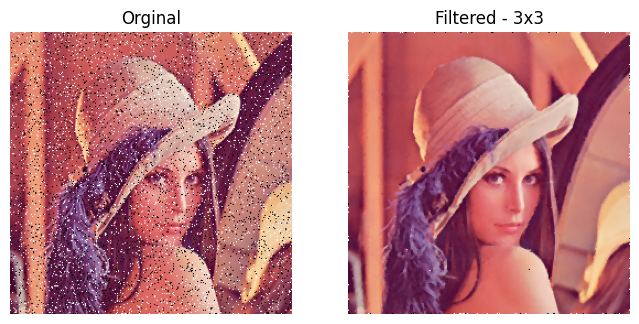

In [7]:
filtered2 = color_filter_med(lena2, 3)
plot_two(lena2, filtered2, t2="Filtered - 3x3")

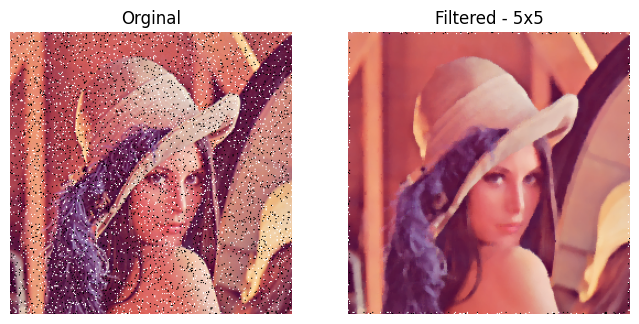

In [8]:
filtered2 = color_filter_med(lena2, 5)
plot_two(lena2, filtered2, t2="Filtered - 5x5")